The reported correlation relates to the first time series. That is, how the first time series should be shifted to match the second, ie: ts2 = ts1 - correlation. Positive correlation is ts1 leading ts2, negative correlation is ts1 lagging ts2.

In [1]:
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfits


from matplotlib.ticker import NullFormatter  # useful for `logit` scale


from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

In [265]:
size=1000
lag=np.pi/4
t1=np.arange(size)/50
t2=np.arange(size)/50
err1=0.1*np.random.rand(size)
err2=0.2*np.random.rand(size)
y1=20*np.sin(t1)+0.1*np.random.rand(size)
y2=50*np.sin(t1-lag)+0.2*np.random.rand(size)

In [266]:
data_my1=pd.DataFrame({'t':t1,'flux':y1,'err':err1},index=None,columns=['t','flux','err'])
data_my2=pd.DataFrame({'t':t2,'flux':y2,'err':err2},index=None,columns=['t','flux','err'])

In [267]:
data_my1,data_my2

(         t       flux       err
 0     0.00   0.007158  0.058728
 1     0.02   0.479630  0.016075
 2     0.04   0.807536  0.087508
 3     0.06   1.276704  0.012120
 4     0.08   1.635849  0.063586
 5     0.10   2.005836  0.012192
 6     0.12   2.423760  0.069923
 7     0.14   2.882056  0.009161
 8     0.16   3.221331  0.043549
 9     0.18   3.624481  0.026524
 10    0.20   4.032405  0.037446
 11    0.22   4.453601  0.093632
 12    0.24   4.784169  0.092757
 13    0.26   5.227843  0.021351
 14    0.28   5.564600  0.061694
 15    0.30   5.975118  0.068144
 16    0.32   6.384132  0.081428
 17    0.34   6.674211  0.092558
 18    0.36   7.134390  0.082579
 19    0.38   7.463942  0.089553
 20    0.40   7.803499  0.040046
 21    0.42   8.169000  0.087434
 22    0.44   8.523999  0.084228
 23    0.46   8.910706  0.018828
 24    0.48   9.329049  0.067503
 25    0.50   9.612657  0.011892
 26    0.52   9.978756  0.053209
 27    0.54  10.299208  0.030825
 28    0.56  10.672906  0.034981
 29    0.5

In [268]:
data_my1.to_csv('example/ts1copy.csv',index=False,header=False)
data_my2.to_csv('example/ts2copy.csv',index=False,header=False)

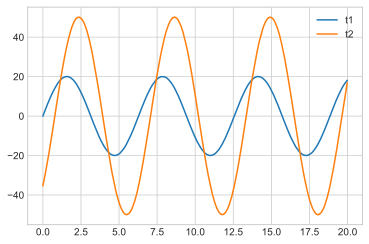

In [269]:
plt.plot(t1,y1,label='t1')
plt.plot(t2,y2,label='t2')
plt.legend()

In [270]:
np.pi/4

0.7853981633974483


    A simple implementation of the discrete correlation function (DCF)
    Author: Damien Robertson - robertsondamien@gmail.com

    Usage:
      $ python dcf.py -h for help and basic instruction




/Users/brettlv/timing_analysis/pydcf/dcf.py:333: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  T = np.linspace(OPTS.lgl[0]+(DT/2.0), OPTS.lgh[0]-(DT/2.0), N)


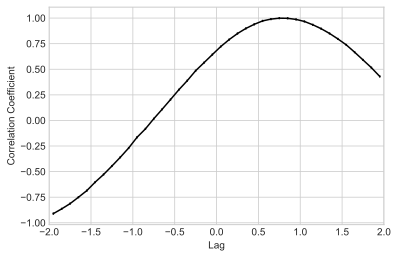

In [273]:
%run dcf.py example/ts1copy.csv example/ts2copy.csv -2 2 0.1

In [274]:
ts1=pd.read_csv('/Users/brettlv/timing_analysis/pydcf/example/ts1copy.csv',header=None)
ts2=pd.read_csv('/Users/brettlv/timing_analysis/pydcf/example/ts2copy.csv',header=None)


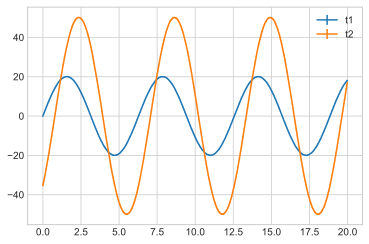

In [275]:
plt.errorbar(ts1[0],ts1[1],ts1[2],label='t1')
plt.errorbar(ts2[0],ts2[1],ts2[2],label='t2')
plt.legend()
#plt.xlim(0,50)
#plt.errorbar(ts2['0'],ts2['1'],ts2['2'])

In [63]:
import os
os.chdir('/Users/brettlv/timing_analysis/pydcf')

In [64]:
ls 

LICENSE         dcf.py          example/
README.md       dcf_output.csv  images/


In [117]:
ts1=pd.read_csv('/Users/brettlv/timing_analysis/pydcf/example/ts1.csv',header=None)
ts2=pd.read_csv('/Users/brettlv/timing_analysis/pydcf/example/ts2.csv',header=None)

In [118]:
ts1.head

<bound method NDFrame.head of             0      1      2
0      42.000  5.931  0.031
1      42.252  5.643  0.031
2      42.496  5.878  0.031
3      42.754  5.761  0.031
4      42.996  5.856  0.031
5      43.250  5.604  0.031
6      43.502  6.018  0.031
7      43.748  5.712  0.031
8      44.002  6.126  0.031
9      44.250  5.828  0.031
10     44.500  5.724  0.031
11     44.753  5.991  0.031
12     45.001  5.621  0.031
13     45.254  5.951  0.031
14     45.504  6.012  0.031
15     45.754  6.024  0.031
16     45.997  5.693  0.031
17     46.251  5.970  0.031
18     47.497  5.723  0.031
19     47.749  6.001  0.031
20     48.001  5.735  0.031
21     48.250  5.803  0.031
22     48.501  5.820  0.031
23     48.750  5.868  0.031
24     48.996  5.812  0.031
25     49.249  6.085  0.031
26     49.496  5.762  0.031
27     49.751  6.088  0.031
28     50.001  5.631  0.031
29     50.249  5.692  0.031
...       ...    ...    ...
1058  357.754  5.786  0.031
1059  358.001  5.606  0.031
1060  358.255  6.0

<Container object of 3 artists>

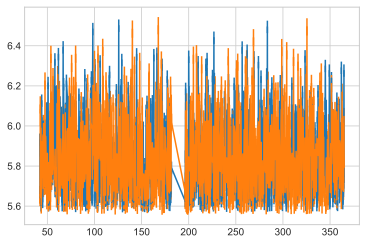

In [119]:
plt.errorbar(ts1[0],ts1[1],ts1[2])
plt.errorbar(ts2[0],ts2[1],ts2[2])
#plt.xlim(0,50)
#plt.errorbar(ts2['0'],ts2['1'],ts2['2'])

In [65]:
pwd

'/Users/brettlv/timing_analysis/pydcf'

In [66]:
ls

LICENSE         dcf.py          example/
README.md       dcf_output.csv  images/



    A simple implementation of the discrete correlation function (DCF)
    Author: Damien Robertson - robertsondamien@gmail.com

    Usage:
      $ python dcf.py -h for help and basic instruction




/Users/brettlv/timing_analysis/pydcf/dcf.py:333: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  T = np.linspace(OPTS.lgl[0]+(DT/2.0), OPTS.lgh[0]-(DT/2.0), N)


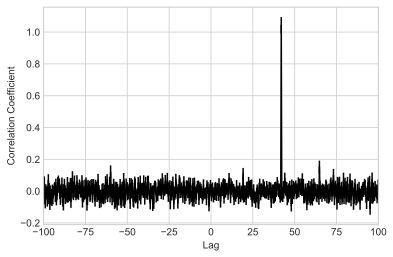

In [67]:
%run dcf.py example/ts1.csv example/ts2.csv -100 100 0.3


    A simple implementation of the discrete correlation function (DCF)
    Author: Damien Robertson - robertsondamien@gmail.com

    Usage:
      $ python dcf.py -h for help and basic instruction




/Users/brettlv/pydcf/dcf.py:333: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  T = np.linspace(OPTS.lgl[0]+(DT/2.0), OPTS.lgh[0]-(DT/2.0), N)


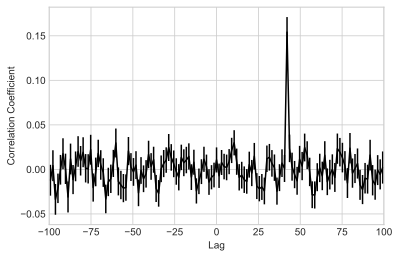

In [46]:
%run dcf.py example/ts1.csv example/ts2.csv -100 100 1.5

In [47]:
%run dcf.py example/ts1.csv example/ts2.csv -100 100 2.5


    A simple implementation of the discrete correlation function (DCF)
    Author: Damien Robertson - robertsondamien@gmail.com

    Usage:
      $ python dcf.py -h for help and basic instruction




/Users/brettlv/pydcf/dcf.py:333: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  T = np.linspace(OPTS.lgl[0]+(DT/2.0), OPTS.lgh[0]-(DT/2.0), N)


The reported correlation relates to the first time series. That is, how the first time series should be shifted to match the second, ie: ts2 = ts1 - correlation. Positive correlation is ts1 leading ts2, negative correlation is ts1 lagging ts2.

In [58]:
%run dcf.py example/ts1.csv example/ts2.csv -100 100 1.5 -v -w=gauss -p=1 -o


    A simple implementation of the discrete correlation function (DCF)
    Author: Damien Robertson - robertsondamien@gmail.com

    Usage:
      $ python dcf.py -h for help and basic instruction



PYTHON SCRIPT: dcf3

INPUT TIMESERIES 1: example/ts1.csv
INPUT TIMESERIES 2: example/ts2.csv
LAG RANGE PROBED  : -100.0  :  100.0
LAG BIN WIDTH     : 1.5

Time series preparation
Linear De-trend Coefficients [a*x + b]
a: -7.2798959424e-05
b: 5.84658515558
Linear De-trend Coefficients [a*x + b]
a: -6.97093141147e-05
b: 5.85132403212

DCF INITIATED USING GAUSSIAN WEIGHTING


/Users/brettlv/pydcf/dcf.py:333: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  T = np.linspace(OPTS.lgl[0]+(DT/2.0), OPTS.lgh[0]-(DT/2.0), N)


DCF COMPLETE
Writing DCF output file to: dcf_output.csv


In [329]:
radio3c273 =pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273time.csv')
t1=radio3c273['mjd']
y1=radio3c273['FLUX(JY)']
err1=radio3c273['ERROR']

In [330]:
data_my1=pd.DataFrame({'t':t1,'flux':y1,'err':err1},index=None,columns=['t','flux','err'])
data_my1.to_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/radio3c273.csv',index=False,header=False)
ts1=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/radio3c273.csv',header=None)

In [338]:
path='/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3C273_86400.lc'
lightcurve=pyfits.open(path)
header=lightcurve[0].header
time=lightcurve[1].data['START']
count=lightcurve[1].data['FLUX_100_300000']
counterr=lightcurve[1].data['ERROR_100_300000']
during=lightcurve[1].data['DURATION']

In [339]:
lightcurve[1].header['MJDREFI']

51910.0

In [340]:
lightcurve[1].header['MJDREFF']

'7.428703703703703D-4'

In [341]:
t2=time/86400+lightcurve[1].header['MJDREFI']+7.4287e-4
y2=count*10e7
err2=counterr*10e7
data_my2=pd.DataFrame({'t':t2,'flux':y2,'err':err2},index=None,columns=['t','flux','err'])
data_my2.to_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/gamma3c273.csv',index=False,header=False)
ts2=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/gamma3c273.csv',header=None)


    A simple implementation of the discrete correlation function (DCF)
    Author: Damien Robertson - robertsondamien@gmail.com

    Usage:
      $ python dcf.py -h for help and basic instruction




/Users/brettlv/timing_analysis/pydcf/dcf.py:333: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  T = np.linspace(OPTS.lgl[0]+(DT/2.0), OPTS.lgh[0]-(DT/2.0), N)


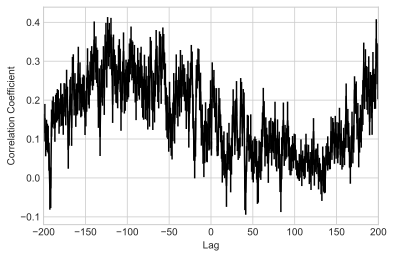

In [342]:
%run dcf.py /Users/brettlv/blog/IHEP_sync/file_to_mac/data/radio3c273.csv /Users/brettlv/blog/IHEP_sync/file_to_mac/data/gamma3c273.csv -200 200 1 

[]

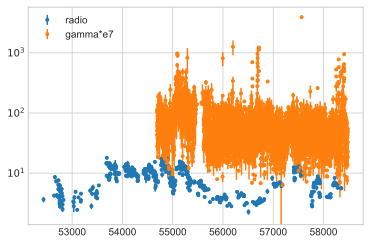

In [344]:
plt.errorbar(ts1[0],ts1[1],ts1[2],fmt='.',label='radio')
plt.errorbar(ts2[0],ts2[1],ts2[2],fmt='.',label='gamma*e7')
plt.legend()
plt.semilogy()

In [345]:
path='/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3C273_604800.lc'
lightcurve=pyfits.open(path)
header=lightcurve[0].header
time=lightcurve[1].data['START']
count=lightcurve[1].data['FLUX_100_300000']
counterr=lightcurve[1].data['ERROR_100_300000']
during=lightcurve[1].data['DURATION']

In [346]:
lightcurve[1].header['MJDREFI'],lightcurve[1].header['MJDREFF']

(51910.0, '7.428703703703703D-4')

In [347]:
t2=time/86400+lightcurve[1].header['MJDREFI']+7.4287e-4
y2=count*10e7
err2=counterr*10e7
data_my3=pd.DataFrame({'t':t2,'flux':y2,'err':err2},index=None,columns=['t','flux','err'])
data_my3.to_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/gamma3c273week.csv',index=False,header=False)
ts3=pd.read_csv('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/gamma3c273week.csv',header=None)


    A simple implementation of the discrete correlation function (DCF)
    Author: Damien Robertson - robertsondamien@gmail.com

    Usage:
      $ python dcf.py -h for help and basic instruction




/Users/brettlv/timing_analysis/pydcf/dcf.py:333: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  T = np.linspace(OPTS.lgl[0]+(DT/2.0), OPTS.lgh[0]-(DT/2.0), N)


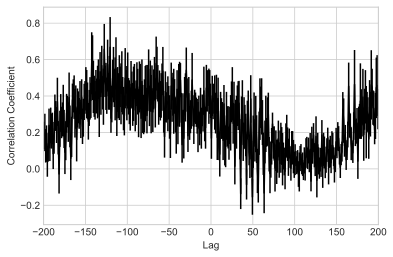

In [348]:
%run dcf.py /Users/brettlv/blog/IHEP_sync/file_to_mac/data/radio3c273.csv /Users/brettlv/blog/IHEP_sync/file_to_mac/data/gamma3c273week.csv -200 200 1 

In [350]:
plt.errorbar(ts1[0],ts1[1],ts1[2],fmt='.',label='radio')
plt.errorbar(ts2[0],ts2[1],ts2[2],fmt='.',label='gammaday*e7')
plt.errorbar(ts3[0],ts3[1],ts3[2],fmt='.',label='gammaweek*e7')
plt.title('3c273')
plt.xlabel('time/mjd')
plt.legend()
plt.semilogy()
plt.savefig('/Users/brettlv/blog/IHEP_sync/file_to_mac/data/3c273lc.png',dpi=300)